#### HW 4

##### 6.8 Q11

In [ ]:
install.packages('pls')
install.packages('ISLR')
install.packages('glmnet')
install.packages('pls')
install.packages('leaps')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISLR)
library(glmnet)
library(pls)
library(leaps)
library(MASS)
set.seed(123)

In [ ]:
sum(is.na(Boston))

[1] 0

In [ ]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [ ]:
round((nrow(Boston)*0.2),0)

[1] 101

##### Split Train Test Boston Dataset

In [ ]:
test_index=sample(nrow(Boston),round((nrow(Boston)*0.2),0),replace=FALSE)
train_set=Boston[-test_index,]
test_set=Boston[test_index,]

In [ ]:
c(nrow(train_set),nrow(test_set),nrow(train_set)+nrow(test_set),nrow(Boston))

[1] 405 101 506 506

In [ ]:
# best subset selection method
model_bss=regsubsets(medv~.,data=Boston,nvmax=13)
model_bss_summary=summary(model_bss)

In [ ]:
names(model_bss_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [ ]:
model_bss_summary$rss

[1] 19472.38 15439.31 13727.99 13228.91 12469.34 12141.07 11868.24 11678.30
 [9] 11526.12 11308.58 11081.36 11078.85 11078.78

In [ ]:
min(model_bss_summary$rss)

[1] 11078.78

In [ ]:
bss_model_pred=mean(model_bss_summary$rss)

In [ ]:
model_bss_summary

Subset selection object
Call: regsubsets.formula(medv ~ ., data = Boston, nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" " " "*

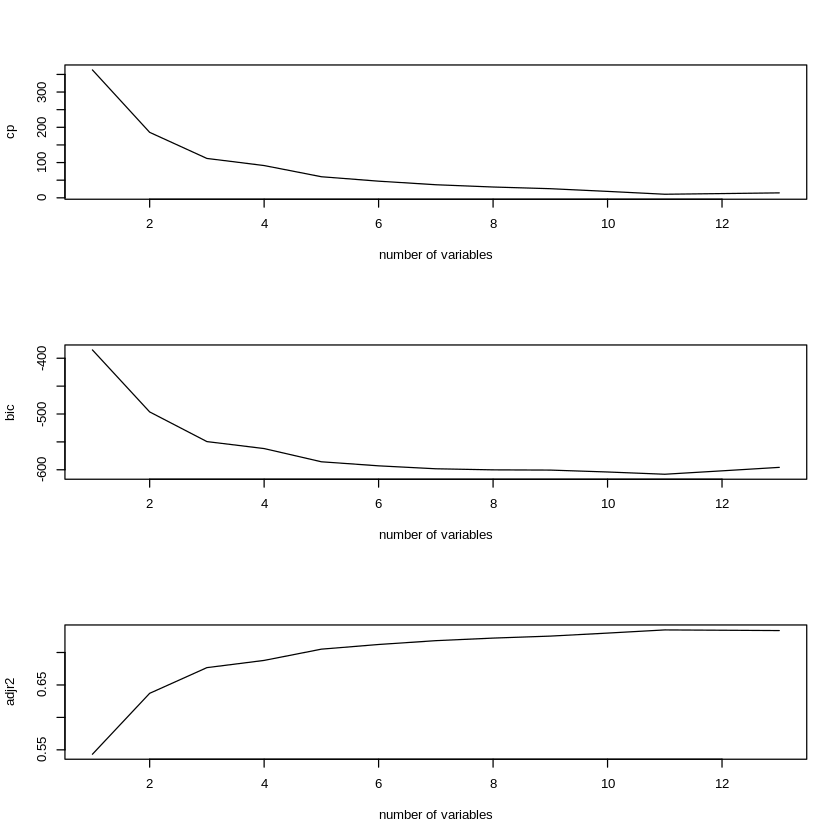

In [ ]:
par(mfrow=c(3,1))
plot(model_bss_summary$cp,xlab='number of variables',ylab='cp',type='l')
plot(model_bss_summary$bic,xlab='number of variables',ylab='bic',type='l')
plot(model_bss_summary$adjr2,xlab='number of variables',ylab='adjr2',type='l')

In [ ]:
indices=c(which.min(model_bss_summary$cp),which.min(model_bss_summary$bic),which.max(model_bss_summary$adjr2))

for (index in indices) {
  cat("Number of variables:",index,"\n")
  cat("Coefficients:\n")
  print(coef(model_bss,id=index))
  cat("\n")
}

Number of variables: 11 
Coefficients:
  (Intercept)          crim            zn          chas           nox 
 36.341145004  -0.108413345   0.045844929   2.718716303 -17.376023429 
           rm           dis           rad           tax       ptratio 
  3.801578840  -1.492711460   0.299608454  -0.011777973  -0.946524570 
        black         lstat 
  0.009290845  -0.522553457 

Number of variables: 11 
Coefficients:
  (Intercept)          crim            zn          chas           nox 
 36.341145004  -0.108413345   0.045844929   2.718716303 -17.376023429 
           rm           dis           rad           tax       ptratio 
  3.801578840  -1.492711460   0.299608454  -0.011777973  -0.946524570 
        black         lstat 
  0.009290845  -0.522553457 

Number of variables: 11 
Coefficients:
  (Intercept)          crim            zn          chas           nox 
 36.341145004  -0.108413345   0.045844929   2.718716303 -17.376023429 
           rm           dis           rad           tax

#### BEST SUBSET

In [ ]:
# best subset selection method
model_bss=regsubsets(medv~.,data=train_set,nvmax=13)
model_bss_summary=summary(model_bss)
best_subset_model=which.min(model_bss_summary$cp)
print(best_subset_model)

[1] 11


In [ ]:
model_bss_summary

Subset selection object
Call: regsubsets.formula(medv ~ ., data = train_set, nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     "*"   "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" " "

In [ ]:
# best_subset_predictors=
names(coef(model_bss,id=best_subset_model))

[1] "(Intercept)" "crim"        "zn"          "chas"        "nox"        
 [6] "rm"          "dis"         "rad"         "tax"         "ptratio"    
[11] "black"       "lstat"

In [ ]:
best_subset_model_pred=predict(lm(medv~crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat,data=train_set),test_set)

#### LS

In [ ]:
lm_model=lm(medv~.,data=train_set)
lm_model_pred=predict(lm_model,test_set)

In [ ]:
train_xmat=model.matrix(medv~.,data=train_set)
test_xmat=model.matrix(medv~.,data=test_set)

#### RIDGE

In [ ]:
# Ridge
model_ridge=cv.glmnet(train_xmat,train_set[,'medv'],alpha=0)
model_ridge_best_lambda=model_ridge$lambda.min
ridge_model_pred=predict(model_ridge,test_xmat,s=model_ridge_best_lambda)

In [ ]:
print(model_ridge_best_lambda)

[1] 0.6964206


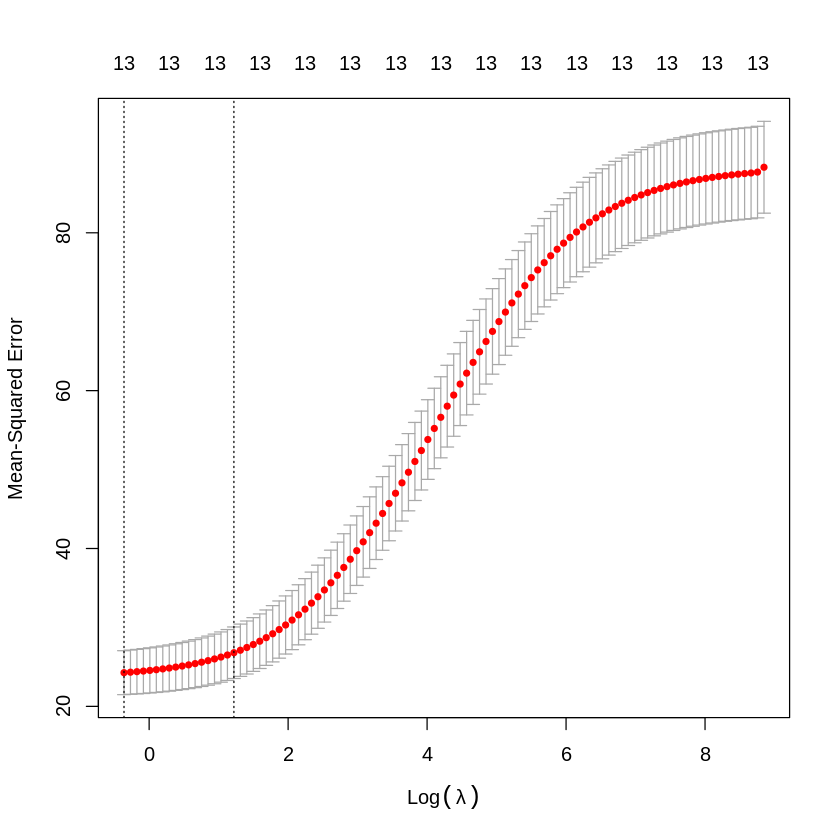

In [ ]:
plot(model_ridge)

#### LASSO

In [ ]:
# Lasso
model_lasso=cv.glmnet(train_xmat,train_set[,'medv'],alpha=1)
model_lasso_best_lambda=model_lasso$lambda.min
lasso_model_pred=predict(model_lasso,test_xmat,s=model_lasso_best_lambda)

In [ ]:
print(model_lasso_best_lambda)

[1] 0.03158183


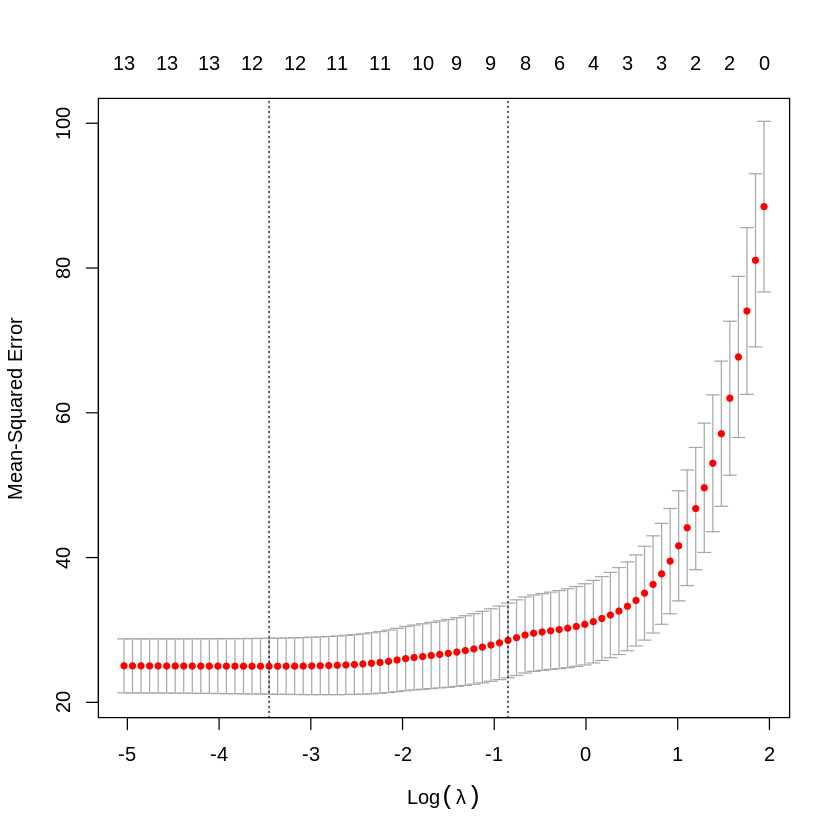

In [ ]:
plot(model_lasso)

In [ ]:
predict(model_lasso,test_xmat,s=model_lasso_best_lambda,type='coefficients')

15 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  35.832397215
(Intercept)   .          
crim         -0.116087086
zn            0.047239333
indus         .          
chas          2.116369879
nox         -17.488486754
rm            3.903641091
age           0.001890364
dis          -1.487045601
rad           0.253142520
tax          -0.010144150
ptratio      -0.962472578
black         0.009242004
lstat        -0.521470115

#### PCR

In [ ]:
model_pcr=pcr(medv~.,data=train_set,scale=TRUE,validation="CV")

In [ ]:
summary(model_pcr)

Data: 	X dimension: 405 13 
	Y dimension: 405 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.403    7.428    6.718    5.794    5.786    5.286    5.222
adjCV        9.403    7.425    6.644    5.785    5.789    5.274    5.211
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.232    5.239    5.255     5.249     5.254     5.094     5.016
adjCV    5.222    5.228    5.244     5.243     5.239     5.077     4.998

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       46.55    57.48    67.47    74.33    80.54    85.84    89.98    93.03
medv    38.03    52.08    63.74    64.19    70.29    70.93    71.07    71.36
      9 comps  10 comps  11 comps  12 comps  13 comps
X       95.18     96.78     98.28     99.55    100.00
medv    71.36     71.58     

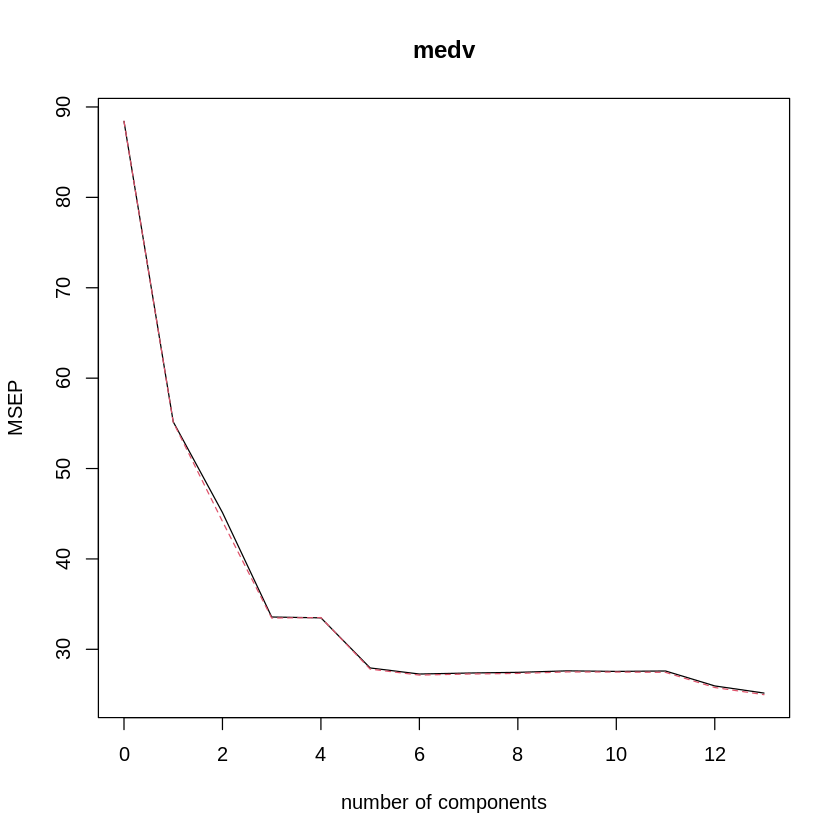

In [ ]:
validationplot(model_pcr,val.type="MSEP")

In [ ]:
model_pcr_pred=predict(model_pcr,test_set,ncomp=6)

#### PLR

In [ ]:
model_plsr=plsr(medv~.,data=train_set,scale=TRUE,validation="CV")

In [ ]:
summary(model_plsr)

Data: 	X dimension: 405 13 
	Y dimension: 405 1
Fit method: kernelpls
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.403    6.622    5.201    5.157    5.193    5.175    5.113
adjCV        9.403    6.619    5.193    5.143    5.168    5.147    5.090
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.085    5.086    5.085     5.086     5.089     5.088     5.088
adjCV    5.064    5.064    5.063     5.064     5.066     5.066     5.066

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       45.22    56.57    63.08    68.23    74.88    78.72    82.21    85.64
medv    51.09    71.28    73.22    74.31    74.76    74.90    75.00    75.07
      9 comps  10 comps  11 comps  12 comps  13 comps
X       90.27     93.47     96.30     98.01    100.00
medv    75.08     75.08 

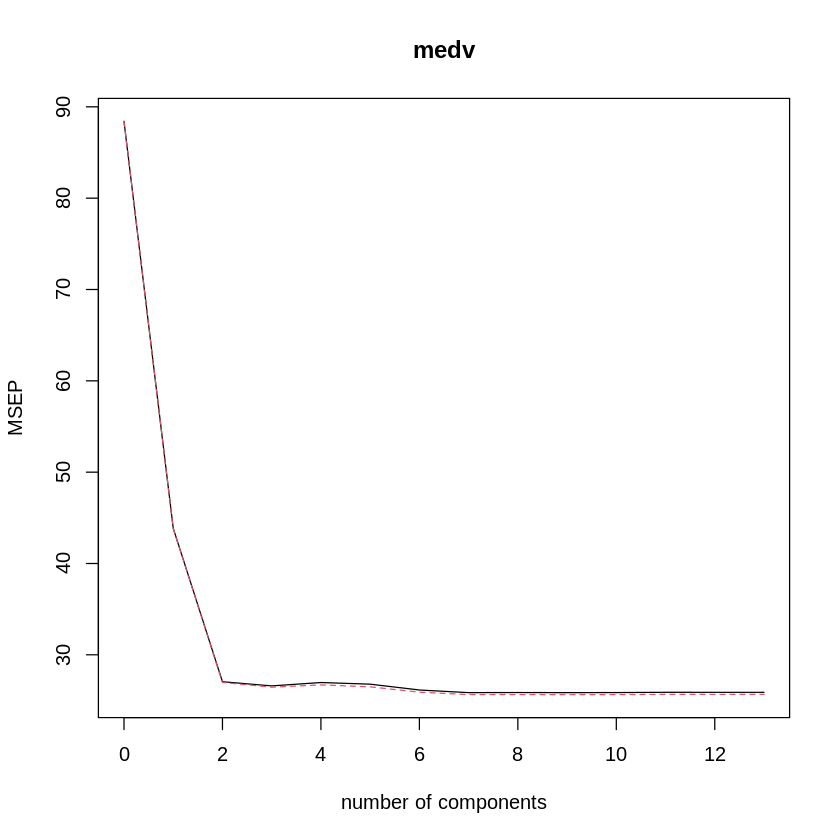

In [ ]:
validationplot(model_plsr,val.type="MSEP")

In [ ]:
model_plsr_pred=predict(model_plsr,test_set,ncomp=7)

In [ ]:
# RSS FOR BEST SUBSET
print(round((mean(sum((test_set[,"medv"]-best_subset_model_pred)^2))),0))

# RSS FOR LM
print(round((mean(sum((test_set[,"medv"]-lm_model_pred)^2))),0))

# RSS FOR RIDGE
print(round((mean(sum((test_set[,"medv"]-ridge_model_pred)^2))),0))

# RSS FOR LASSO
print(round((mean(sum((test_set[,"medv"]-lasso_model_pred)^2))),0))

# RSS FOR PCR
print(round((mean(sum((test_set[,"medv"]-model_pcr_pred)^2))),0))

# RSS FOR PLR
print(round((mean(sum((test_set[,"medv"]-model_plsr_pred)^2))),0))

[1] 2245
[1] 2255
[1] 2212
[1] 2226
[1] 2452
[1] 2287


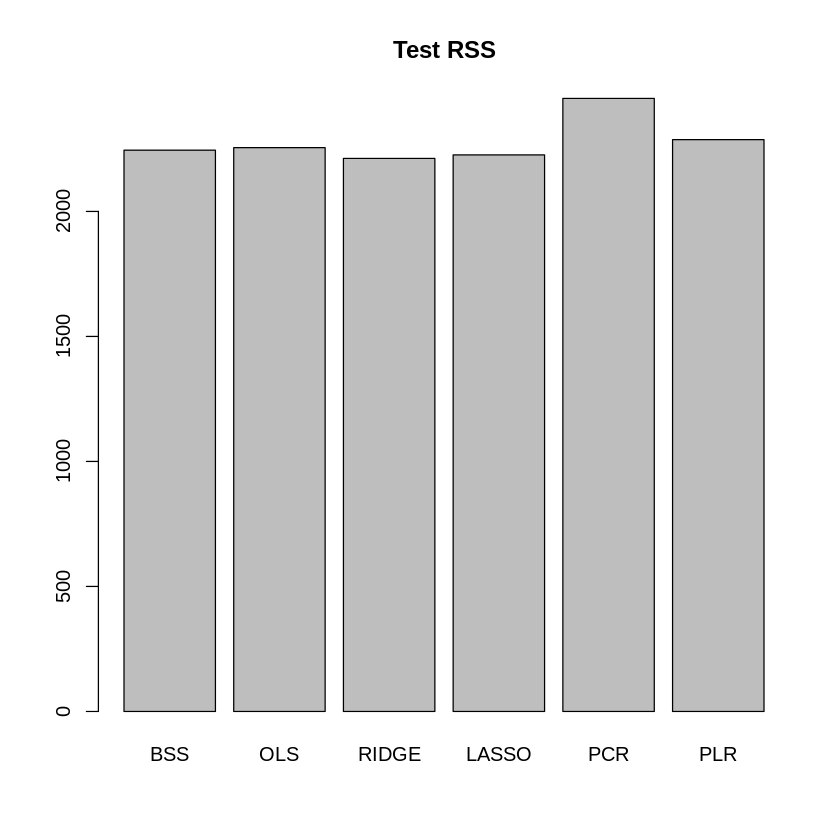

In [ ]:
barplot(c(2245,2255,2212,2226,2452,2287),col="grey",names.arg=c("BSS","OLS","RIDGE","LASSO","PCR","PLR"),main="Test RSS")

##### 7.9 Q3

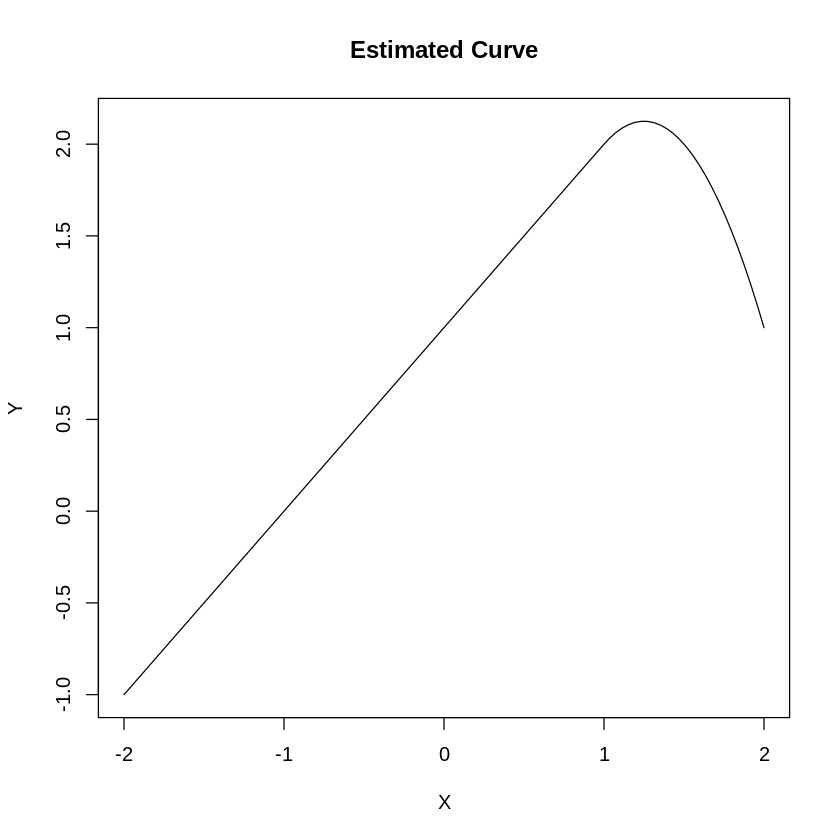

In [ ]:
x_feature=seq(from=-2,to=2,length.out=100)
beta0=1
beta1=(1 * x_feature)
beta2=(-2 * ((x_feature-1)^2 * I(x_feature>1)))
y_target=beta0+beta1+beta2
plot(x_feature,y_target,type="l",xlab="X",ylab="Y",main="Estimated Curve")

##### 7.9 Q4

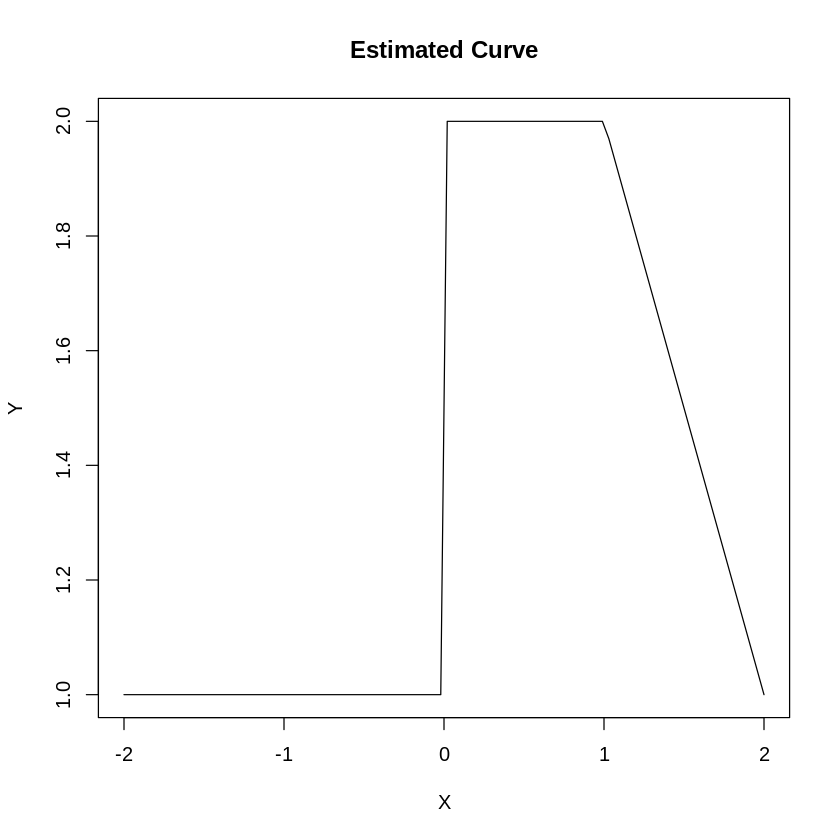

In [ ]:
x_feature=seq(from=-2,to=2,length.out=100)
beta0=1
beta1=(1 * ((I(0 <= x_feature) & I(x_feature <= 2)) - ((x_feature - 1) * (I(1 <= x_feature) & I(x_feature <= 2)))))
beta2=(3 * (((x_feature - 3) * (I(3 <= x_feature) & I(x_feature <= 4))) + (I(4 < x_feature) & I(x_feature <= 5))))
y_target=beta0+beta1+beta2
plot(x_feature,y_target,type="l",xlab="X",ylab="Y",main="Estimated Curve")

##### 7.9 Q6

In [ ]:
install.packages('ISLR')
install.packages('boot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISLR)
library(boot)
set.seed(123)

In [ ]:
sum(is.na(Wage))

[1] 0

In [ ]:
names(Wage)

[1] "year"       "age"        "maritl"     "race"       "education" 
 [6] "region"     "jobclass"   "health"     "health_ins" "logwage"   
[11] "wage"

In [ ]:
cv_error_10_fold=rep(0,10)

for(i in 1:10){
  poly_fit=glm(wage~poly(age,i),data=Wage)
  cv_error_10_fold[i]=cv.glm(Wage,poly_fit,K=10)$delta[1]
}

In [ ]:
# Optimal Degree
print(which.min(cv_error_10_fold))

[1] 10


In [ ]:
cv_error_10_fold

[1] 1676.988 1602.473 1597.036 1594.582 1594.424 1594.157 1596.532 1593.351
 [9] 1593.285 1593.154

In [ ]:
# Checking the differnce between the nearest values
cv_error_10_fold[4] - cv_error_10_fold[10]
cv_error_10_fold[5] - cv_error_10_fold[10]
cv_error_10_fold[6] - cv_error_10_fold[10]

[1] 1.428494

[1] 1.270587

[1] 1.003767

In [ ]:
# Compare with ANOVA
anova_results=anova(lm(wage ~ poly(age,10),data=Wage))
cat("Degree chosen by ANOVA:",which.min(anova_results$"Pr(>F)"),"\n")

Degree chosen by ANOVA: 1 


In [ ]:
fit_1=lm(wage~poly(age,1),data=Wage)
fit_2=lm(wage~poly(age,2),data=Wage)
fit_3=lm(wage~poly(age,3),data=Wage)
fit_4=lm(wage~poly(age,4),data=Wage)
fit_5=lm(wage~poly(age,5),data=Wage)
fit_6=lm(wage~poly(age,6),data=Wage)
fit_7=lm(wage~poly(age,7),data=Wage)
fit_8=lm(wage~poly(age,8),data=Wage)
fit_9=lm(wage~poly(age,9),data=Wage)
fit_10=lm(wage~poly(age,10),data=Wage)
anova_results=anova(fit_1,fit_2,fit_3,fit_4,fit_5,fit_6,fit_7,fit_8,fit_9,fit_10)

In [ ]:
anova_results

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,2.287860e+05,1.437638e+02,2.187330e-32
3,2996,4777674,1,1.575569e+04,9.900512e+00,1.668583e-03
4,2995,4771604,1,6.070152e+03,3.814342e+00,5.090874e-02
5,2994,4770322,1,1.282563e+03,8.059328e-01,3.693978e-01
6,2993,4766389,1,3.932258e+03,2.470939e+00,1.160744e-01
7,2992,4763834,1,2.555281e+03,1.605679e+00,2.051989e-01
8,2991,4763707,1,1.266690e+02,7.959584e-02,7.778654e-01
9,2990,4756703,1,7.004317e+03,4.401350e+00,3.599425e-02


In [ ]:
anova_results$"Pr(>F)"

[1]           NA 2.187330e-32 1.668583e-03 5.090874e-02 3.693978e-01
 [6] 1.160744e-01 2.051989e-01 7.778654e-01 3.599425e-02 9.675292e-01

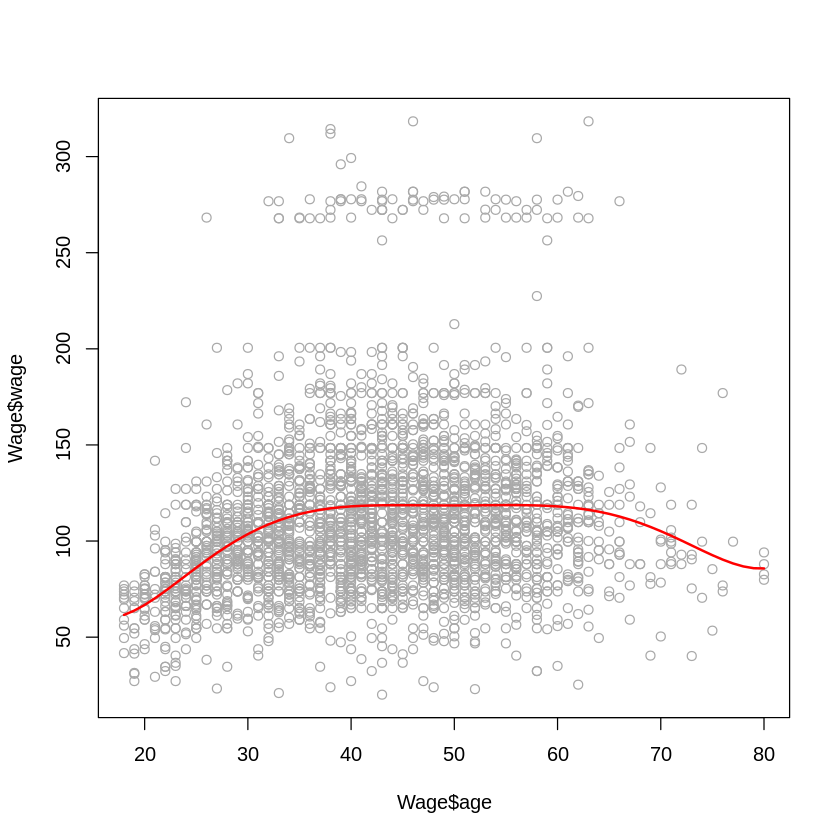

In [ ]:
age_lim=range(Wage$age)
age_grid=seq(from=age_lim[1],to=age_lim[2])
age_preds=predict(fit_6,newdata=list(age=age_grid),se=TRUE)
plot(Wage$age,Wage$wage,col="darkgrey")
lines(age_grid,age_preds$fit,lwd=2,col='red',xlim=age_lim)

In [ ]:
cv_error_10_fold_step=rep(NA,10)
for(i in 2:10){
  Wage$new_age_cut=cut(Wage$age,i)
 step_fit=glm(wage~new_age_cut,data=Wage)
 cv_error_10_fold_step[i]=cv.glm(Wage,step_fit,K=10)$delta[1]
}

In [ ]:
which.min(cv_error_10_fold_step)

[1] 8

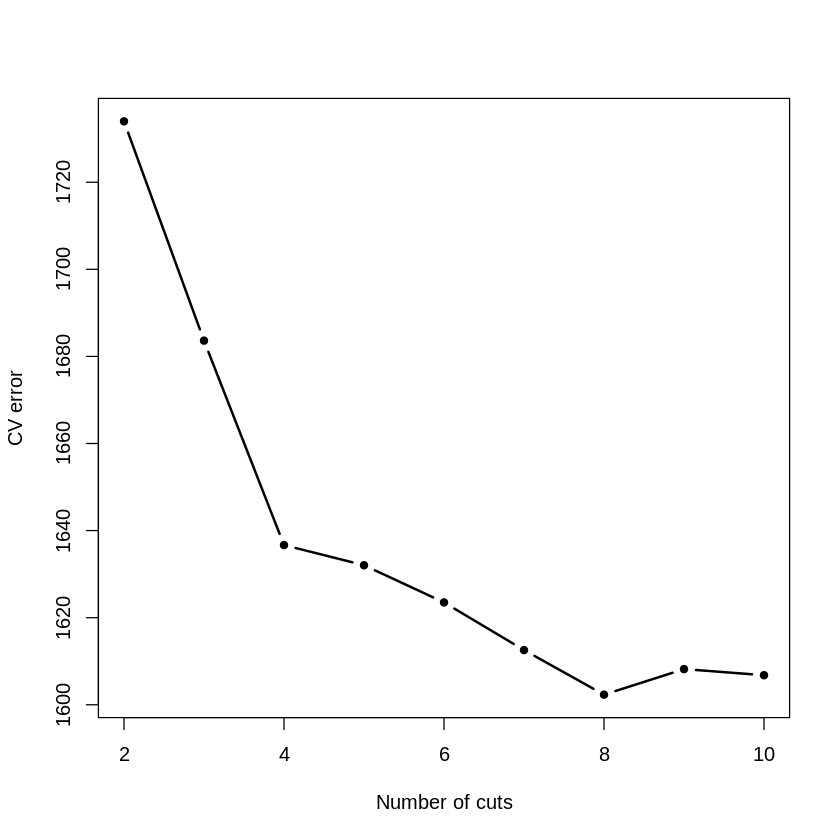

In [ ]:
plot(2:10,cv_error_10_fold_step[-1],type='b',xlab="Number of cuts",ylab="CV error",pch=20,lwd=2)

In [ ]:
age_lim=range(Wage$age)
age_grid=seq(from=age_lim[1],to=age_lim[2])
step_fit=glm(wage~cut(age,8),data=Wage)
age_preds=predict(step_fit,newdata=list(age=age_grid),se=TRUE)

In [ ]:
summary(step_fit)


Call:
glm(formula = wage ~ cut(age, 8), data = Wage)

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              76.282      2.630  29.007  < 2e-16 ***
cut(age, 8)(25.8,33.5]   25.833      3.161   8.172 4.44e-16 ***
cut(age, 8)(33.5,41.2]   40.226      3.049  13.193  < 2e-16 ***
cut(age, 8)(41.2,49]     43.501      3.018  14.412  < 2e-16 ***
cut(age, 8)(49,56.8]     40.136      3.177  12.634  < 2e-16 ***
cut(age, 8)(56.8,64.5]   44.102      3.564  12.373  < 2e-16 ***
cut(age, 8)(64.5,72.2]   28.948      6.042   4.792 1.74e-06 ***
cut(age, 8)(72.2,80.1]   15.224      9.781   1.556     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1597.576)

    Null deviance: 5222086  on 2999  degrees of freedom
Residual deviance: 4779946  on 2992  degrees of freedom
AIC: 30652

Number of Fisher Scoring iterations: 2


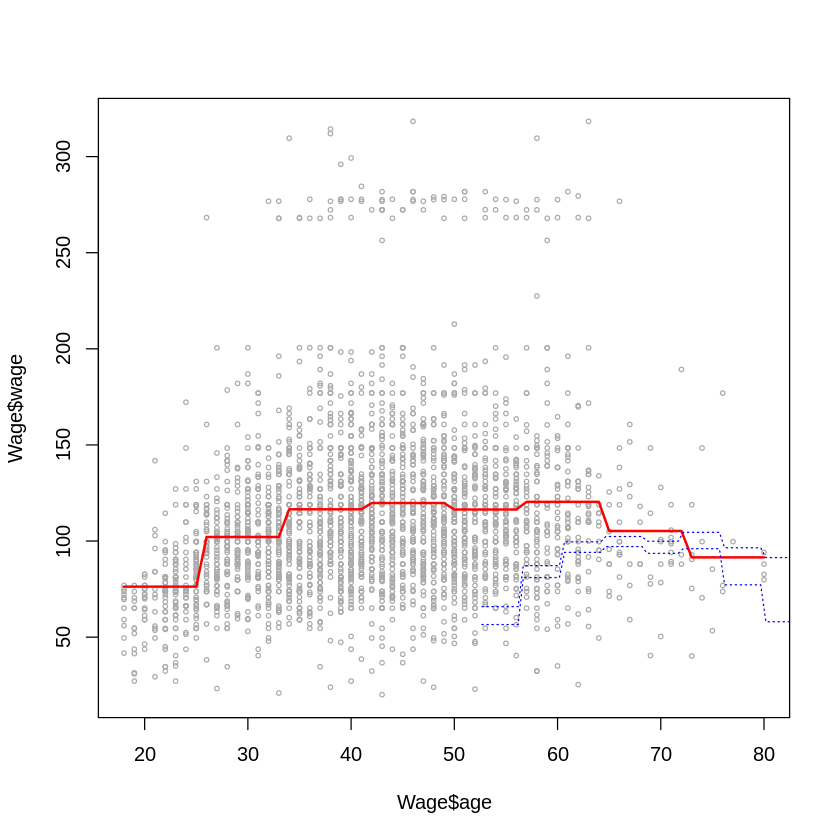

In [ ]:
plot(Wage$age,Wage$wage,xlim=age_lim,cex=.5,col="darkgrey")
lines(age_grid,age_preds$fit,lwd=2,col='red',xlim=age_lim)
se_bands=age_preds$fit + cbind(2*age_preds$se.fit,-2*age_preds$se.fit)
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1) ,oma=c(0,0,4,0))
matlines(age_grid,se_bands,lwd=1,col="blue",lty=3)

##### 8.4 Q8

###### (a)

In [ ]:
install.packages(c("ISLR","MASS","tree"))

library(ISLR)
library(MASS)
library(tree)
set.seed(123)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
sum(is.na(Carseats))

[1] 0

In [ ]:
round((nrow(Carseats)*0.2),0)

[1] 80

In [ ]:
test_index=sample(nrow(Carseats),round((nrow(Carseats)*0.2),0),replace=FALSE)
train_set=Carseats[-test_index,]
test_set=Carseats[test_index,]

In [ ]:
c(nrow(train_set),nrow(test_set),nrow(train_set)+nrow(test_set),nrow(Carseats))

[1] 320  80 400 400

In [ ]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

###### (b)

In [ ]:
tree_fit_carseats=tree(Sales~.,data=train_set)

In [ ]:
summary(tree_fit_carseats)


Regression tree:
tree(formula = Sales ~ ., data = train_set)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Age"         "Advertising"
Number of terminal nodes:  16 
Residual mean deviance:  2.368 = 719.8 / 304 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.73000 -1.06900 -0.03295  0.00000  1.12500  3.98300 

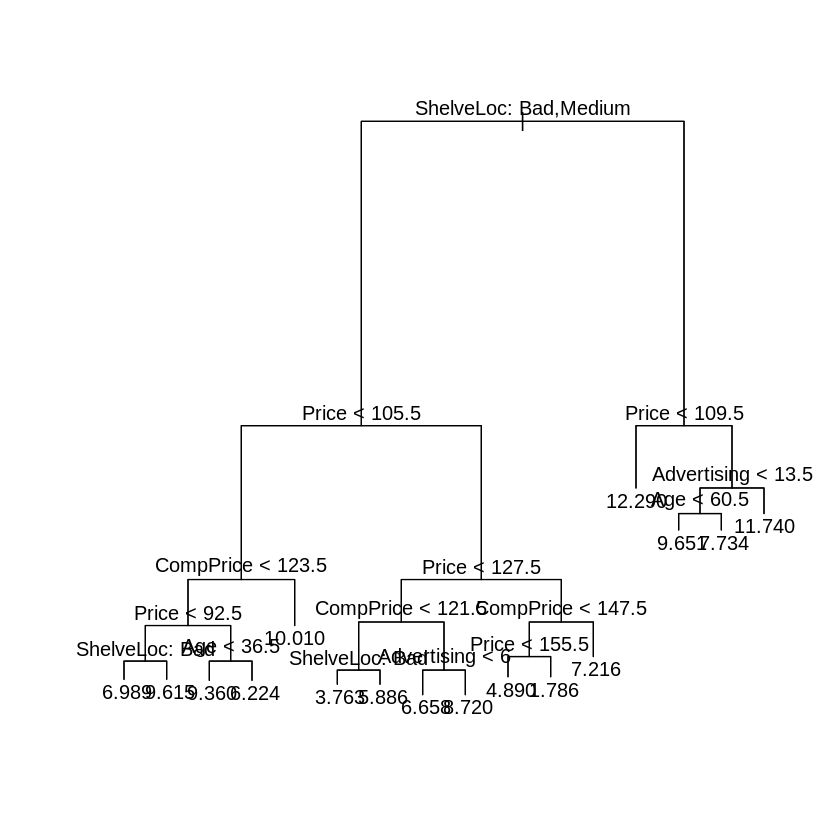

In [ ]:
plot(tree_fit_carseats)
text(tree_fit_carseats,pretty=0)

In [ ]:
pred_carseats=predict(tree_fit_carseats,newdata=test_set)
# RSS
print(mean((test_set[,"Sales"]-pred_carseats)^2))

[1] 4.524503


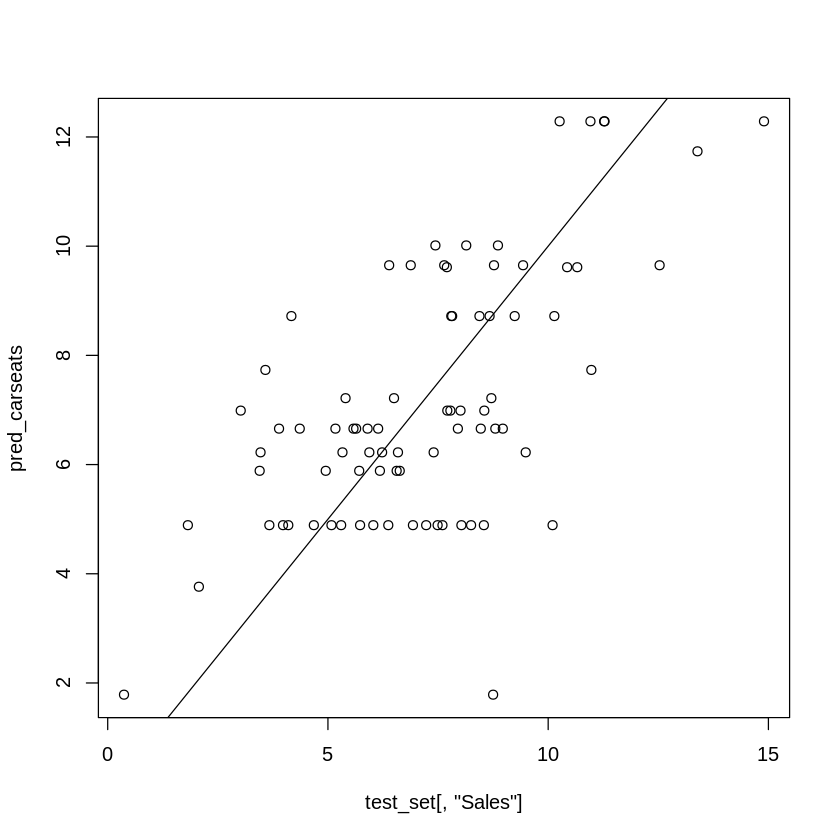

In [ ]:
plot(test_set[,"Sales"],pred_carseats)
abline(0,1)

###### (c)

In [ ]:
cv_fit_carseats=cv.tree(tree_fit_carseats,FUN=prune.tree)

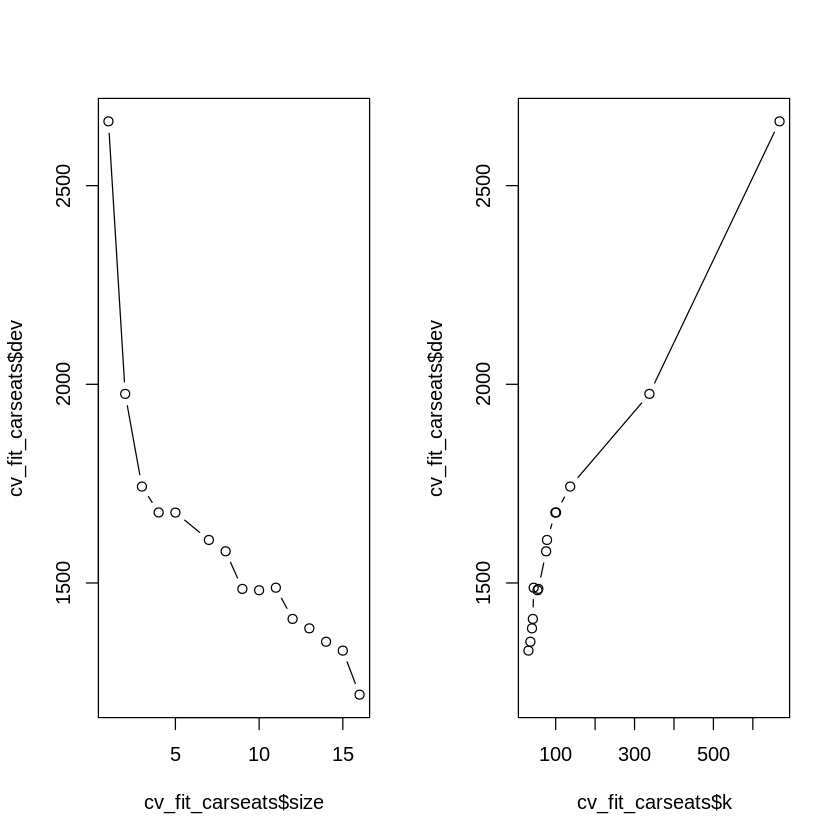

In [ ]:
par(mfrow=c(1,2))
plot(cv_fit_carseats$size,cv_fit_carseats$dev,type="b")
plot(cv_fit_carseats$k,cv_fit_carseats$dev,type="b")

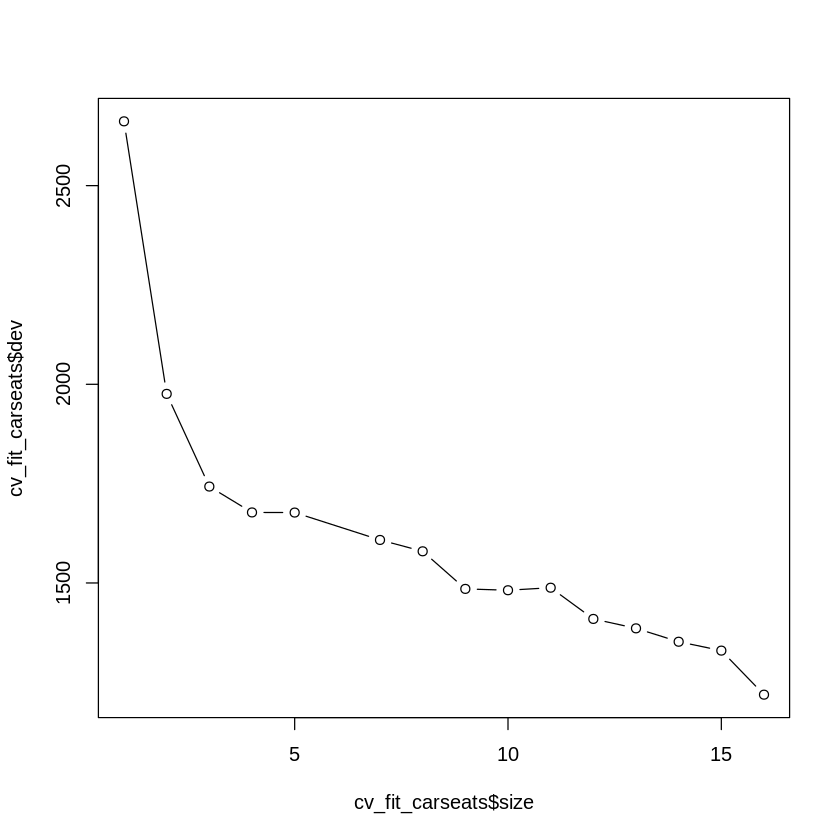

In [ ]:
plot(cv_fit_carseats$size,cv_fit_carseats$dev,type="b")

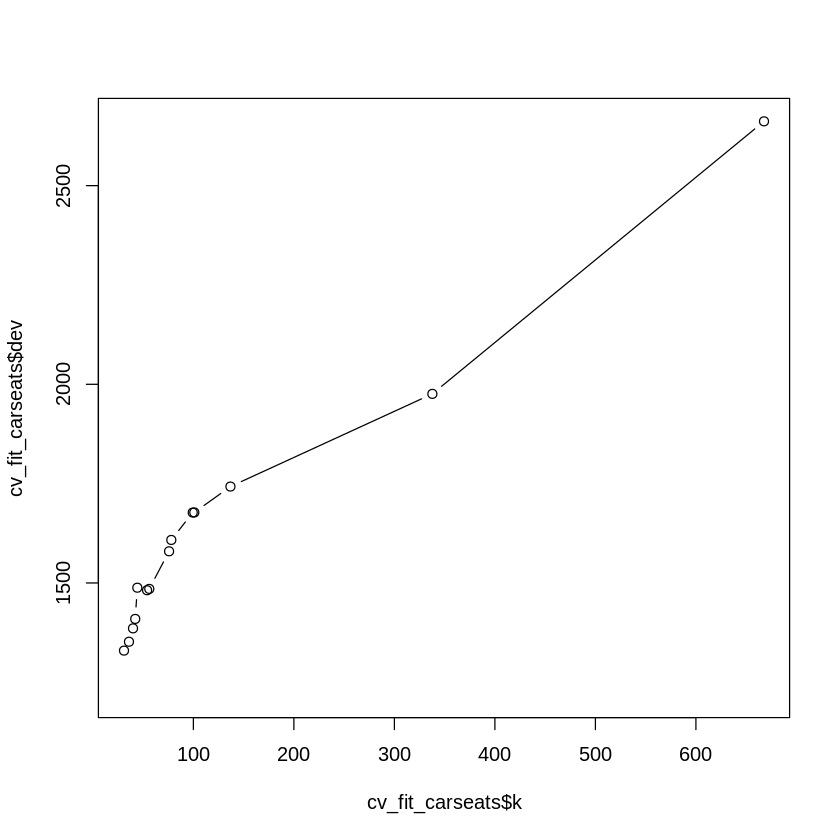

In [ ]:
plot(cv_fit_carseats$k,cv_fit_carseats$dev,type="b")

In [ ]:
cv_fit_carseats$dev

[1] 1218.829 1329.709 1352.054 1385.755 1409.452 1488.027 1481.645 1485.037
 [9] 1579.643 1608.225 1677.163 1677.467 1742.621 1975.868 2661.807

In [ ]:
order(cv_fit_carseats$dev,decreasing=TRUE)

[1] 15 14 13 12 11 10  9  6  8  7  5  4  3  2  1

In [ ]:
cv_fit_carseats$dev[order(cv_fit_carseats$dev,decreasing=TRUE)]

[1] 2661.807 1975.868 1742.621 1677.467 1677.163 1608.225 1579.643 1488.027
 [9] 1485.037 1481.645 1409.452 1385.755 1352.054 1329.709 1218.829

In [ ]:
which.min(cv_fit_carseats$dev)

[1] 1

In [ ]:
cv_fit_carseats$size

[1] 16 15 14 13 12 11 10  9  8  7  5  4  3  2  1

In [ ]:
cv_fit_carseats$size[which.min(cv_fit_carseats$dev)]

[1] 16

In [ ]:
cv_fit_carseats$size[2]

[1] 15

In [ ]:
# Best size=15
pruned_tree_fit_carseats=prune.tree(tree_fit_carseats,best=15)

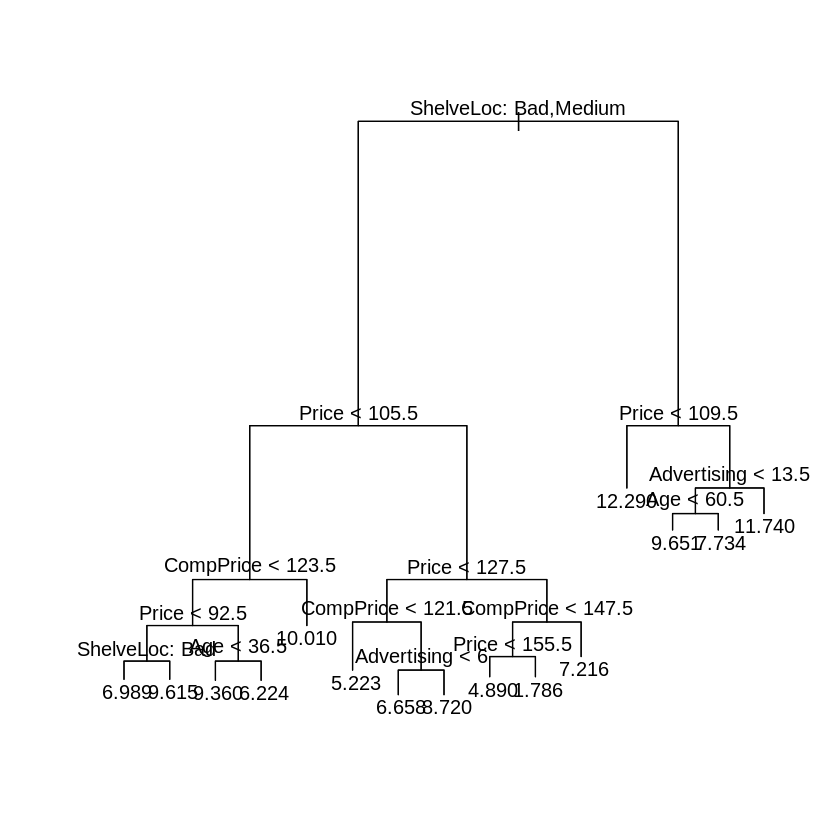

In [ ]:
par(mfrow=c(1,1))
plot(pruned_tree_fit_carseats)
text(pruned_tree_fit_carseats,pretty=0)

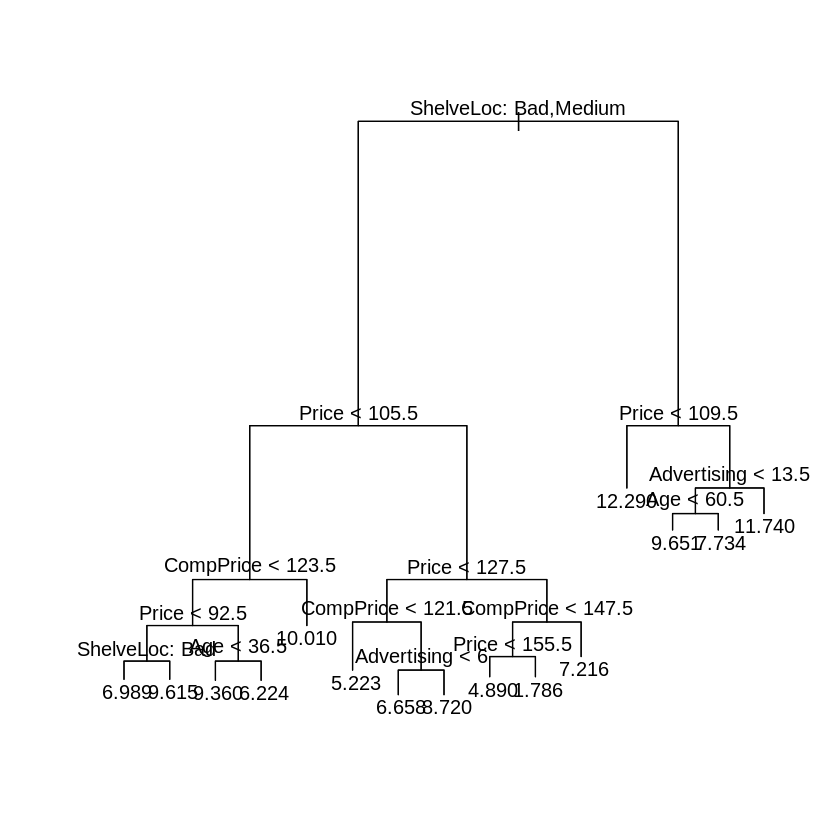

In [ ]:
plot(pruned_tree_fit_carseats)
text(pruned_tree_fit_carseats,pretty=0)

In [ ]:
pred_pruned_tree_carseats=predict(pruned_tree_fit_carseats,newdata=test_set)
# RSS
print(mean((test_set[,"Sales"]-pred_pruned_tree_carseats)^2))

[1] 4.61547


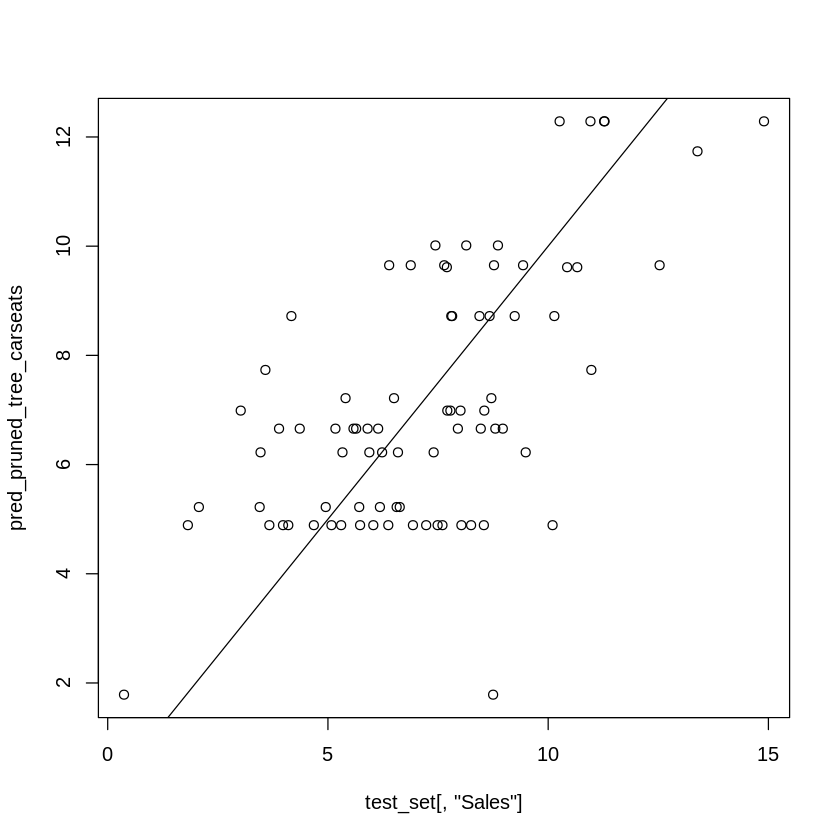

In [ ]:
plot(test_set[,"Sales"],pred_pruned_tree_carseats)
abline(0,1)

###### (d)

In [ ]:
install.packages("randomForest")
library(randomForest)
set.seed(123)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [ ]:
length(names(Carseats))

[1] 11

In [ ]:
# mtry=10 since there are 10 features in our dataset
bagging_tree_fit_carseats=randomForest(Sales~.,data=train_set,mtry=10,ntree=500,importance=TRUE)

In [ ]:
bagging_tree_fit_carseats


Call:
 randomForest(formula = Sales ~ ., data = train_set, mtry = 10,      ntree = 500, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.416323
                    % Var explained: 70.48

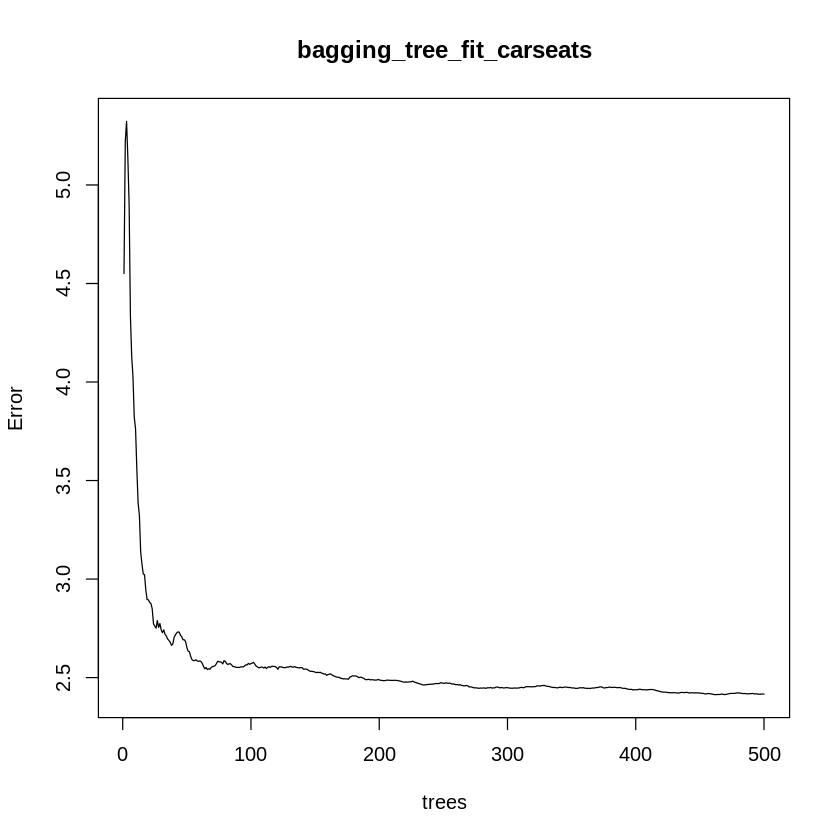

In [ ]:
plot(bagging_tree_fit_carseats)

In [ ]:
importance(bagging_tree_fit_carseats)

,%IncMSE,IncNodePurity
CompPrice,39.2991436,295.86022
Income,8.5434106,127.38073
Advertising,25.9778905,187.24770
Population,-0.8111062,77.44502
Price,75.2007060,793.15835
ShelveLoc,77.4531097,779.61842
Age,24.4879951,223.69338
Education,0.1221569,58.22658
Urban,-1.5513958,12.65388
US,3.4161960,12.28613


In [ ]:
importance_df=as.data.frame(importance(bagging_tree_fit_carseats))
importance_df=importance_df[order(importance_df$IncNodePurity,decreasing=TRUE),]
print(importance_df)

               %IncMSE IncNodePurity
Price       75.2007060     793.15835
ShelveLoc   77.4531097     779.61842
CompPrice   39.2991436     295.86022
Age         24.4879951     223.69338
Advertising 25.9778905     187.24770
Income       8.5434106     127.38073
Population  -0.8111062      77.44502
Education    0.1221569      58.22658
Urban       -1.5513958      12.65388
US           3.4161960      12.28613


In [ ]:
pred_bagging_tree_carseats=predict(bagging_tree_fit_carseats,newdata=test_set)
# RSS
print(mean((test_set[,"Sales"]-pred_bagging_tree_carseats)^2))

[1] 2.4614


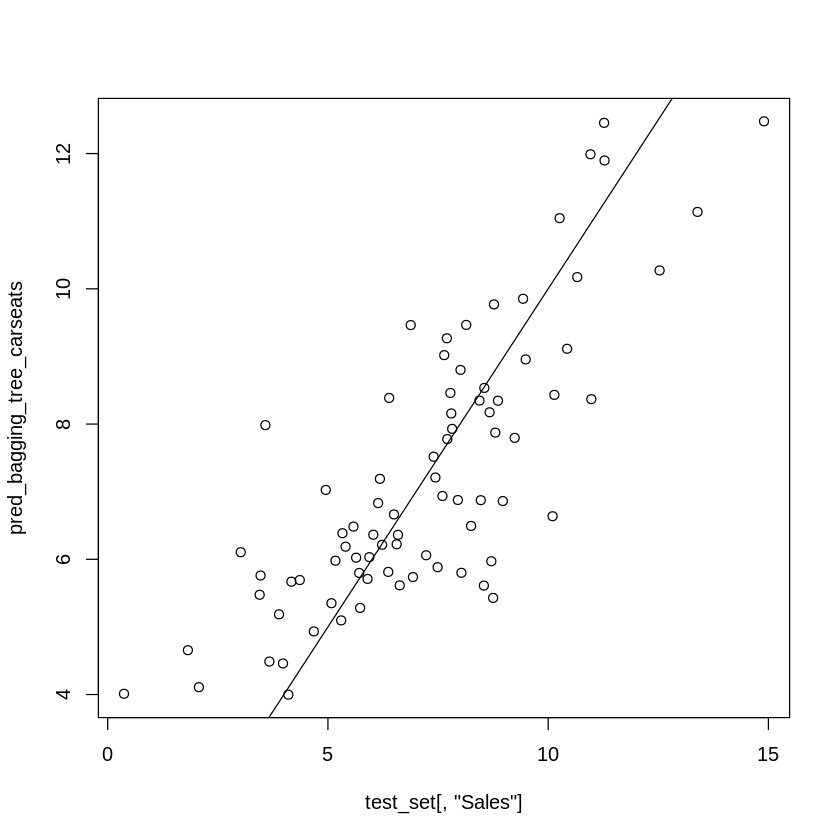

In [ ]:
plot(test_set[,"Sales"],pred_bagging_tree_carseats)
abline(0,1)

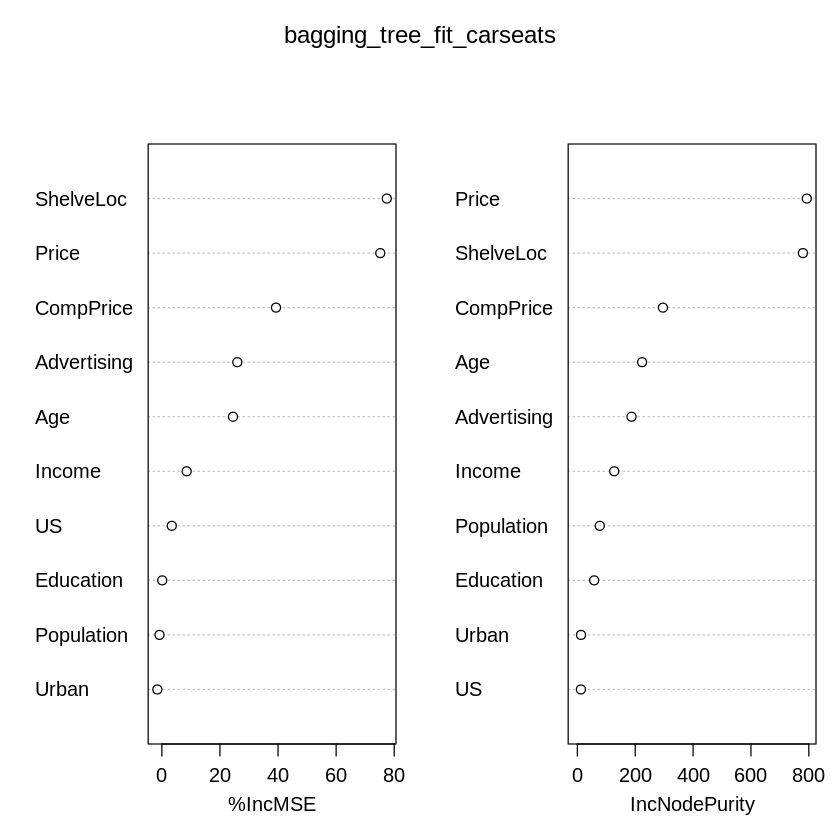

In [ ]:
varImpPlot(bagging_tree_fit_carseats)

###### (e)

In [ ]:
rf_test_tree_fit_carseats=randomForest(Sales~.,data=train_set,mtry=4,ntree=500,importance=TRUE)

In [ ]:
rf_test_tree_fit_carseats


Call:
 randomForest(formula = Sales ~ ., data = train_set, mtry = 4,      ntree = 500, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 2.569219
                    % Var explained: 68.61

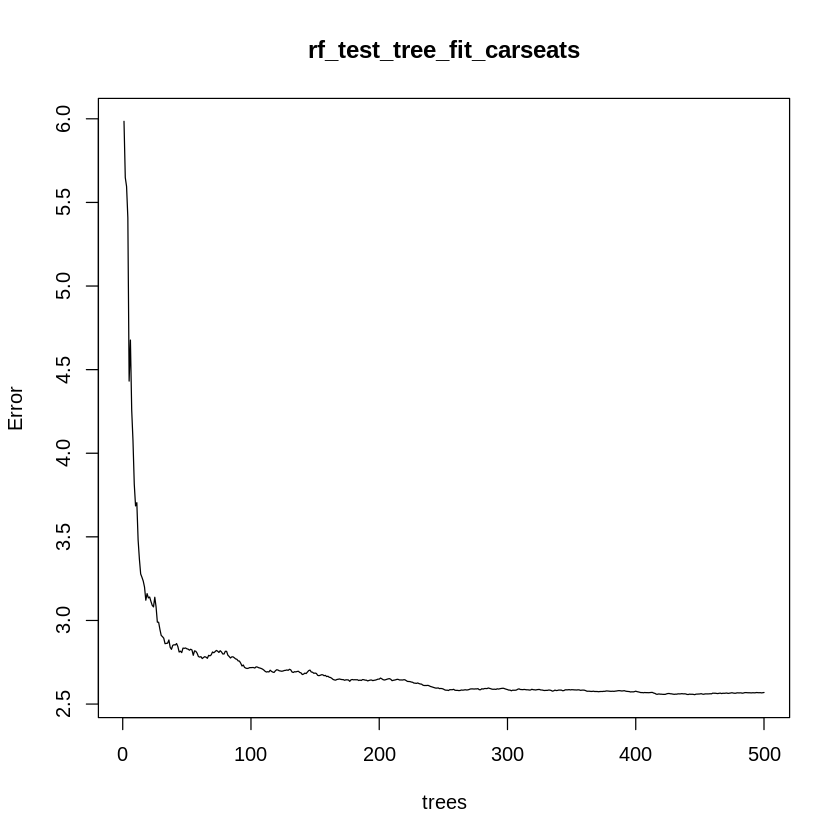

In [ ]:
plot(rf_test_tree_fit_carseats)

In [ ]:
importance(rf_test_tree_fit_carseats)

,%IncMSE,IncNodePurity
CompPrice,22.28020940,248.11592
Income,6.20923721,161.83926
Advertising,19.23940938,220.50459
Population,-1.21460898,136.45040
Price,58.34148199,685.32685
ShelveLoc,62.63892103,657.96488
Age,17.47530115,265.96282
Education,1.80244823,86.70930
Urban,-0.05418617,17.47154
US,4.99441804,34.69823


In [ ]:
importance_df=as.data.frame(importance(rf_test_tree_fit_carseats))
importance_df=importance_df[order(importance_df$IncNodePurity,decreasing=TRUE),]
print(importance_df)

                %IncMSE IncNodePurity
Price       58.34148199     685.32685
ShelveLoc   62.63892103     657.96488
Age         17.47530115     265.96282
CompPrice   22.28020940     248.11592
Advertising 19.23940938     220.50459
Income       6.20923721     161.83926
Population  -1.21460898     136.45040
Education    1.80244823      86.70930
US           4.99441804      34.69823
Urban       -0.05418617      17.47154


In [ ]:
pred_rf_test_tree_carseats=predict(rf_test_tree_fit_carseats,newdata=test_set)
# RSS
print(mean((test_set[,"Sales"]-pred_rf_test_tree_carseats)^2))

[1] 2.515899


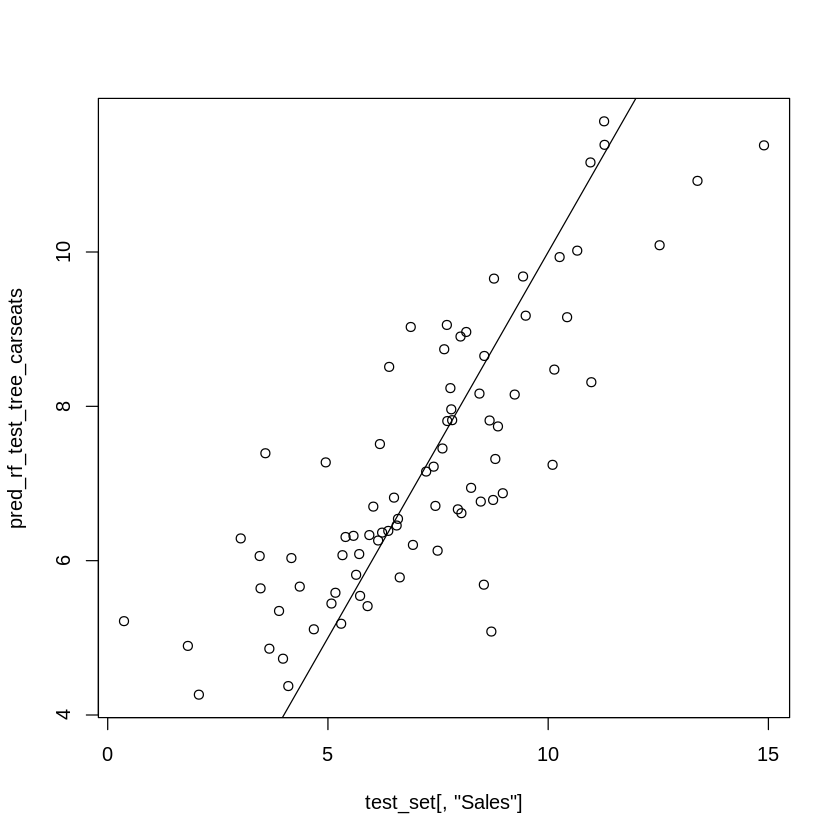

In [ ]:
plot(test_set[,"Sales"],pred_rf_test_tree_carseats)
abline(0,1)

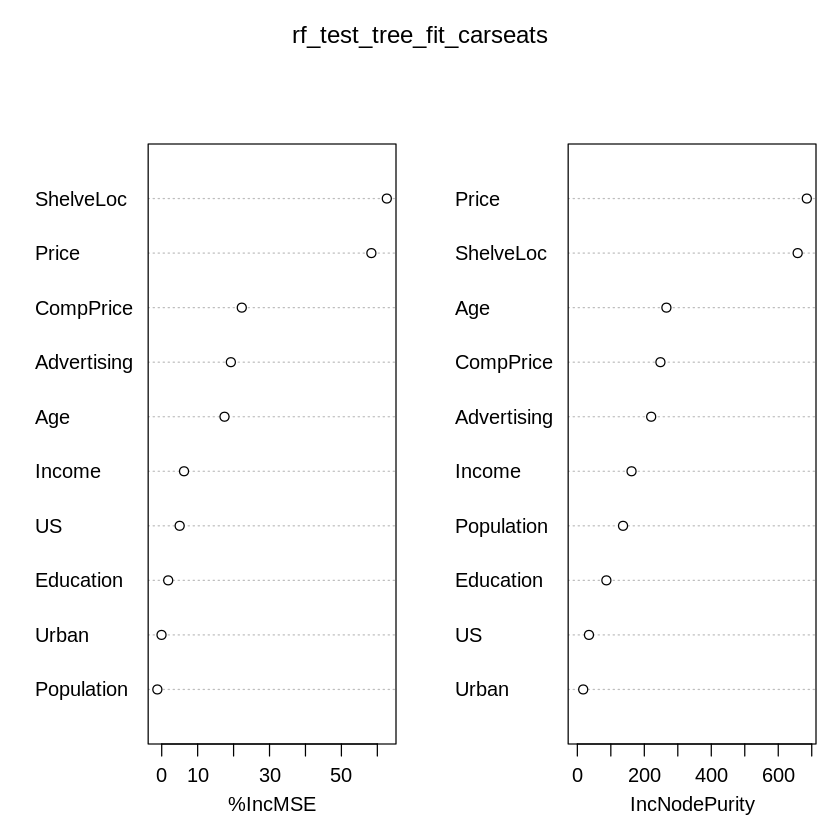

In [ ]:
varImpPlot(rf_test_tree_fit_carseats)

In [ ]:
rf_test_tree_fit_carseats=randomForest(Sales~.,data=train_set,mtry=4,ntree=70,importance=TRUE)

In [ ]:
rf_test_tree_fit_carseats


Call:
 randomForest(formula = Sales ~ ., data = train_set, mtry = 4,      ntree = 70, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 70
No. of variables tried at each split: 4

          Mean of squared residuals: 2.577535
                    % Var explained: 68.51

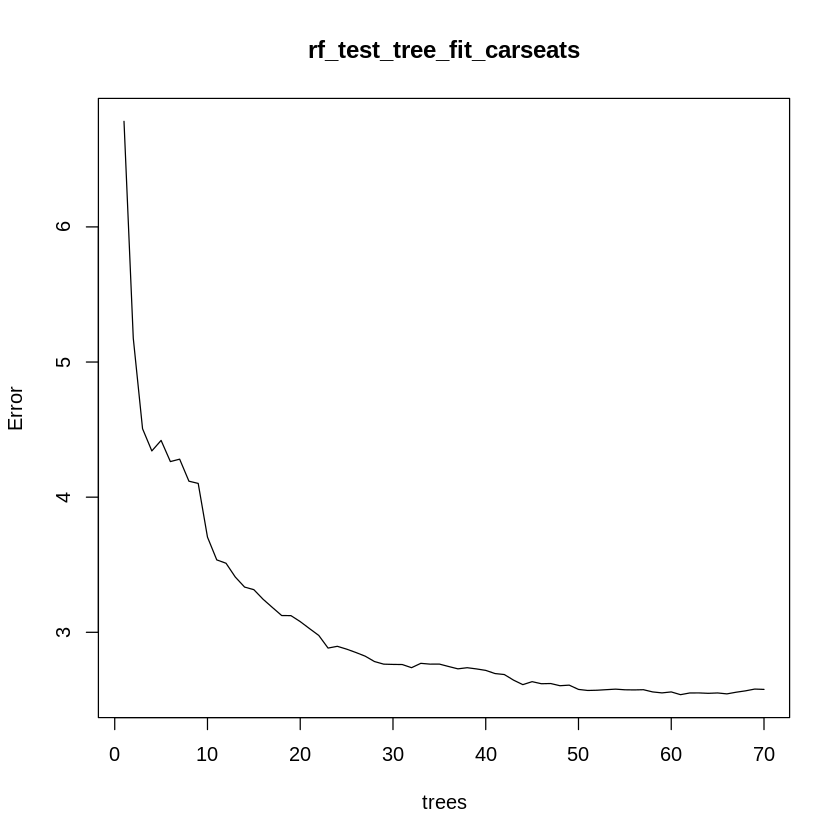

In [ ]:
plot(rf_test_tree_fit_carseats)

In [ ]:
importance(rf_test_tree_fit_carseats)

,%IncMSE,IncNodePurity
CompPrice,10.8157026,257.62494
Income,2.7129265,166.43085
Advertising,6.7914465,207.61943
Population,0.3878201,143.74432
Price,20.9572455,705.61601
ShelveLoc,23.4340204,677.21917
Age,6.3841250,248.29709
Education,0.7013594,74.82883
Urban,-1.1596397,18.59521
US,3.3066630,28.12392


In [ ]:
importance_df=as.data.frame(importance(rf_test_tree_fit_carseats))
importance_df=importance_df[order(importance_df$IncNodePurity,decreasing=TRUE),]
print(importance_df)

               %IncMSE IncNodePurity
Price       20.9572455     705.61601
ShelveLoc   23.4340204     677.21917
CompPrice   10.8157026     257.62494
Age          6.3841250     248.29709
Advertising  6.7914465     207.61943
Income       2.7129265     166.43085
Population   0.3878201     143.74432
Education    0.7013594      74.82883
US           3.3066630      28.12392
Urban       -1.1596397      18.59521


In [ ]:
pred_rf_test_tree_carseats=predict(rf_test_tree_fit_carseats,newdata=test_set)
# RSS
print(mean((test_set[,"Sales"]-pred_rf_test_tree_carseats)^2))

[1] 2.527695


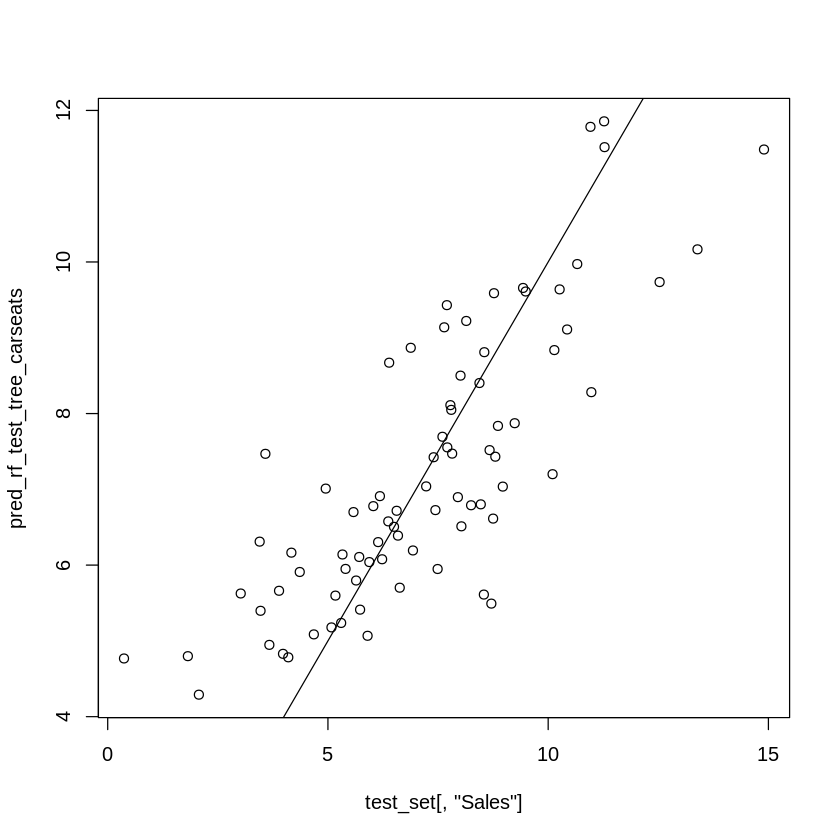

In [ ]:
plot(test_set[,"Sales"],pred_rf_test_tree_carseats)
abline(0,1)

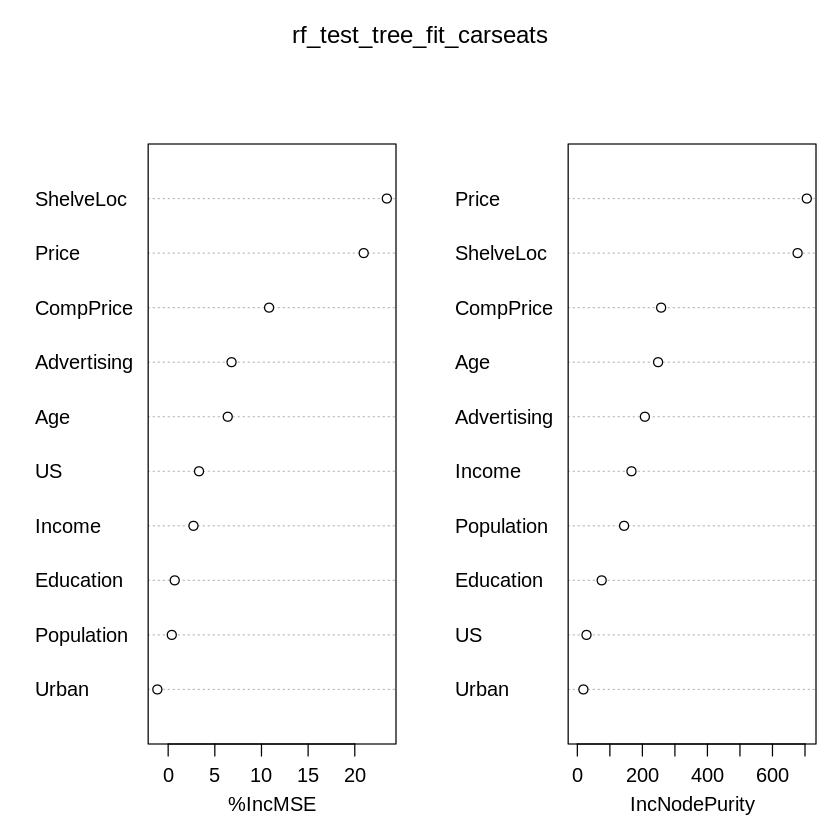

In [ ]:
varImpPlot(rf_test_tree_fit_carseats)

In [ ]:
d_errors=numeric(10)
for ( d in seq(1,10) ) {
  rf_test_tree_fit_carseats=randomForest(Sales~.,data=train_set,mtry=d,ntree=50,importance=TRUE)
  pred_rf_test_tree_carseats=predict(rf_test_tree_fit_carseats,newdata=test_set)
  # RSS
  d_errors[d]=mean((test_set[,"Sales"]-pred_rf_test_tree_carseats)^2)
}

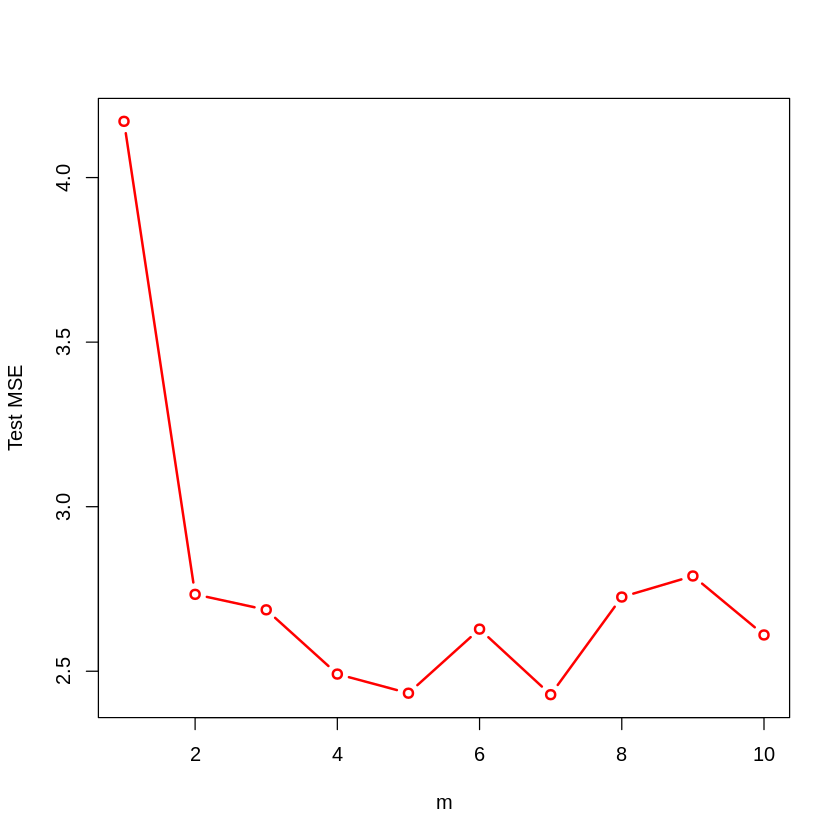

In [ ]:
plot(d_errors,col="red",type="b",lwd=2,xlab="m",ylab="Test MSE")